# STOCK PREDICTION USING TWITTER SENTIMENT ANALYSIS

### importing libraries

In [1]:
!pip install yahoo_fin
!pip install requests_html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for viz 
from yahoo_fin import stock_info as si #for financial data
import yahoo_fin as yahoofinance #for financial data
from sklearn.linear_model import LinearRegression #for analysis 
import tweepy #for twitter APIs
from textblob import TextBlob  # to process text data
from datetime import datetime # to convert timestamp to datetime

In [4]:
#1 connect to twitter +get avg sentiment per day 

#### setting up consumer key and access token

In [5]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

##### Fetching tweets for Bitcoin in extended mode (cancelled due to data extraction limitation from twitter) 

In [6]:
#fetch_tweets=tweepy.Cursor(api.search, q="#BTC",count=100000000, lang ="en",since="2000-01-01", tweet_mode="extended").items()

In [7]:
#sleep_on_rate_limit=False

In [8]:
#data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['time','Tweets'])

#### load previously twitter loaded data 16m tweets

In [10]:

data= pd.read_csv("bitcoin tweets/tweets.csv", sep=';',error_bad_lines=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
data.head(10)

,id,user,fullname,url,timestamp,replies,likes,retweets,text
0,1132977055300300800,KamdemAbdiel,Abdiel kamdem,NaN,2019-05-27 11:49:14+00,0.0,0.0,0.0,È appena uscito un nuovo video! LES CRYPTOMONN...
1,1132977073402736640,bitcointe,Bitcointe,NaN,2019-05-27 11:49:18+00,0.0,0.0,0.0,Cardano: Digitize Currencies; EOS https://t.co...
2,1132977023893139456,3eyedbran,Bran - 3 Eyed Raven,NaN,2019-05-27 11:49:06+00,0.0,2.0,1.0,Another Test tweet that wasn't caught in the s...
3,1132977089089556481,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:49:22+00,0.0,0.0,0.0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,1132977092340191232,mmursaleen72,Muhammad Mursaleen,NaN,2019-05-27 11:49:23+00,0.0,0.0,0.0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...
5,1132977100309319680,0nurTOKA,🐻🔫💥🐂🚀🙏,NaN,2019-05-27 11:49:25+00,0.0,0.0,0.0,#btc inceldiği yerden kopsun bakalım 17:00 ye ...
6,1132977101638897665,evilrobotted,evilrobotted,NaN,2019-05-27 11:49:25+00,0.0,0.0,0.0,@nwoodfine We have been building on the real #...
7,1132977108836323330,jabur_guilherme,Guilherme Jabur,NaN,2019-05-27 11:49:27+00,0.0,0.0,0.0,"@pedronauck como investidor, vc é um ótimo dev..."
8,1132977131850350593,INTBICON,億り人彼氏,NaN,2019-05-27 11:49:32+00,0.0,0.0,0.0,ブラジルはまぁ置いといてもドイツは存在感出してくるのかな。ロシアもマイニングなどで元気になる...
9,1132977132714561536,MLWright15,ML Wright,NaN,2019-05-27 11:49:32+00,0.0,0.0,0.0,"CHANGE IS COMING...GET READY!!! Boom, Another ..."


#### Removing special character from each tweets

In [98]:
data_head='null'

In [99]:
data_head=data.sample(200000)

In [100]:
data_head['Tweets']=data_head['text'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(\d+)", " ")

In [101]:
#data_head['time'] = pd.to_datetime(data_head['timestamp'], format='%Y')

In [102]:
data_head['time'] = data_head['timestamp']

In [103]:
""" data_head['time']=''
for i in data_head.index:
    #print(i)
    #print(datetime.strftime(datetime.strptime(data_head['timestamp'][i],'%Y-%m-%d %H:%M:%S+00'), '%Y-%m-%d'))
    #print(data_head['timestamp'][i])
    data_head['time'][i] = (datetime.strftime(datetime.strptime(data_head['timestamp'][i],'%Y-%m-%d %H:%M:%S+00'), '%Y-%m-%d'))
    
"""

" data_head['time']=''\nfor i in data_head.index:\n    #print(i)\n    #print(datetime.strftime(datetime.strptime(data_head['timestamp'][i],'%Y-%m-%d %H:%M:%S+00'), '%Y-%m-%d'))\n    #print(data_head['timestamp'][i])\n    data_head['time'][i]=(datetime.strftime(datetime.strptime(data_head['timestamp'][i],'%Y-%m-%d %H:%M:%S+00'), '%Y-%m-%d'))\n    \n"

In [104]:
data_head=data_head[['Tweets','time','replies','likes','retweets']]

In [105]:
data_head=data_head.dropna()
data_head.reset_index(drop=True, inplace=True)

#### Creating a dataframe where we will combine the tweets date wise and store into

In [106]:
sentiment=[]
for i in data_head.index:
    #try:
        sentiment.append(TextBlob(data_head.Tweets[i]).sentiment.polarity)
   # except:
   #     pass

In [107]:
data_head["sentiment"]=sentiment
data_head

,Tweets,time,replies,likes,retweets,sentiment
0,The terms Google Bomb and Googlewashing refer ...,2018-04-07 21:29:57+00,0.0,0.0,0.0,0.0
1,SuperCashAppFriday ...,2019-07-27 02:39:19+00,0.0,0.0,0.0,0.0
2,Deutsche CEO Scolded Bankers Who Had Suits Fit ...,2019-07-11 21:57:51+00,0.0,3.0,1.0,0.0
3,a bitcoin,2018-08-03 16:44:10+00,0.0,0.0,0.0,0.0
4,When ebay makes Bitcoin a payment option wil...,2019-05-15 06:06:38+00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
186524,Bitcoin Fiyatlar Dolar Baraj n A acak ...,2017-10-10 07:46:18+00,0.0,0.0,0.0,0.0
186525,BTC BRL em s bitcoin b...,2018-11-30 10:00:02+00,0.0,0.0,0.0,0.0
186526,Former Mt Gox CEO Is No Longer a Bitcoin Beli...,2018-04-06 04:45:42+00,0.0,0.0,0.0,0.0
186527,system maintenance,2019-09-17 08:26:11+00,0.0,0.0,0.0,0.0


##### weighted sentiment (sum all like, replies and retweet and multiply per each sentiment) 

In [180]:
data_head['weighted sentiment']=(1+data_head.replies+data_head.likes+data_head.retweets)*sentiment

data_head

,Tweets,time,replies,likes,retweets,sentiment,weighted sentiment
0,The terms Google Bomb and Googlewashing refer ...,2018-04-07 21:29:57+00,0.0,0.0,0.0,0.0,0.0
1,SuperCashAppFriday ...,2019-07-27 02:39:19+00,0.0,0.0,0.0,0.0,0.0
2,Deutsche CEO Scolded Bankers Who Had Suits Fit...,2019-07-11 21:57:51+00,0.0,3.0,1.0,0.0,0.0
3,a bitcoin,2018-08-03 16:44:10+00,0.0,0.0,0.0,0.0,0.0
4,When ebay makes Bitcoin a payment option wil...,2019-05-15 06:06:38+00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
186524,Bitcoin Fiyatlar Dolar Baraj n A acak ...,2017-10-10 07:46:18+00,0.0,0.0,0.0,0.0,0.0
186525,BTC BRL em s bitcoin b...,2018-11-30 10:00:02+00,0.0,0.0,0.0,0.0,0.0
186526,Former Mt Gox CEO Is No Longer a Bitcoin Beli...,2018-04-06 04:45:42+00,0.0,0.0,0.0,0.0,0.0
186527,system maintenance,2019-09-17 08:26:11+00,0.0,0.0,0.0,0.0,0.0


In [109]:
data_test=0

In [110]:
data_test=data_head

In [111]:
data_test = data_test[data_test['weighted sentiment']!=0]

In [112]:
data_test

,Tweets,time,replies,likes,retweets,sentiment,weighted sentiment
6,If you think I m being nasty because I do...,2019-07-31 19:34:33+00,0.0,0.0,0.0,-0.416667,-0.416667
8,The idea of this project is so innovative I v...,2019-06-21 21:01:50+00,0.0,0.0,0.0,0.250000,0.250000
9,network sits the Ethereum Blockchain to prov...,2019-09-04 04:36:07+00,0.0,0.0,0.0,0.250000,0.250000
11,That s my line will be amazing to watch ...,2018-08-01 01:00:40+00,0.0,0.0,0.0,0.373611,0.373611
12,yeh news wale fake news spread kar rahe h...,2019-08-21 15:26:54+00,0.0,0.0,0.0,-0.500000,-0.500000
...,...,...,...,...,...,...,...
186512,So when you say BTC do you mean Bitcoin or Bit...,2018-06-04 00:45:36+00,1.0,5.0,0.0,-0.312500,-2.187500
186516,Crazy to see of pple say they haven t w...,2019-10-24 19:35:04+00,0.0,0.0,0.0,0.133333,0.133333
186518,OKEx Initiates Clawback after Bitcoin Futu...,2018-08-03 10:28:53+00,0.0,0.0,0.0,-0.500000,-0.500000
186520,Algowave Reports Crypto Market Predictions ...,2019-01-08 20:45:08+00,0.0,2.0,1.0,0.200000,0.800000


In [113]:
#change data format of the tweet timestamp. 
data_test.time=data_test.time.str.slice(0, 10)
data_test.time=pd.to_datetime(data_test.time, format='%Y-%m-%d')
data_test

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Tweets,time,replies,likes,retweets,sentiment,weighted sentiment
6,If you think I m being nasty because I do...,2019-07-31,0.0,0.0,0.0,-0.416667,-0.416667
8,The idea of this project is so innovative I v...,2019-06-21,0.0,0.0,0.0,0.250000,0.250000
9,network sits the Ethereum Blockchain to prov...,2019-09-04,0.0,0.0,0.0,0.250000,0.250000
11,That s my line will be amazing to watch ...,2018-08-01,0.0,0.0,0.0,0.373611,0.373611
12,yeh news wale fake news spread kar rahe h...,2019-08-21,0.0,0.0,0.0,-0.500000,-0.500000
...,...,...,...,...,...,...,...
186512,So when you say BTC do you mean Bitcoin or Bit...,2018-06-04,1.0,5.0,0.0,-0.312500,-2.187500
186516,Crazy to see of pple say they haven t w...,2019-10-24,0.0,0.0,0.0,0.133333,0.133333
186518,OKEx Initiates Clawback after Bitcoin Futu...,2018-08-03,0.0,0.0,0.0,-0.500000,-0.500000
186520,Algowave Reports Crypto Market Predictions ...,2019-01-08,0.0,2.0,1.0,0.200000,0.800000


In [114]:
#aggregating sentiment per day, thus taking the average sentiment per day
data_test=data_test[["time","weighted sentiment","sentiment"]].groupby(["time"]).mean()

In [115]:
data_test

,weighted sentiment,sentiment
time,,
2012-02-05,0.500000,0.500000
2012-03-17,0.112500,0.056250
2012-04-05,0.136364,0.136364
2012-05-07,0.200000,0.200000
2012-07-30,0.266667,0.266667
...,...,...
2019-11-19,0.544285,0.207619
2019-11-20,3.126931,0.203856
2019-11-21,1.878451,0.197086


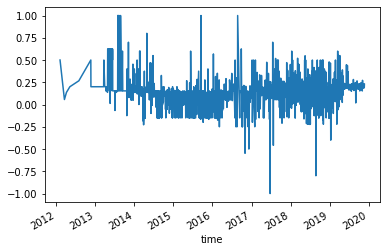

In [116]:
data_test[data_test['weighted sentiment']!=0].sentiment.plot()

In [117]:
#saving the clean twitter data on csv as a backup !
data_test.to_csv('twitter clean data.csv')


In [118]:
#set indcies
#data_test.set_index("time")

#change the index type to match between the two data sets
data_test.index=data_test.index.astype('datetime64[ns]')

#### Now after having all tweets' sentiment (and weighted sentiment) ready for analysis, we start working on the stock prices

#### Connect to Stock prices, from Yahoo finance

In [139]:
BTCUSD=0

In [140]:
# get live price of Bitcoin
BTCUSD=si.get_live_price("BTC-USD")

In [141]:
BTCUSD=si.get_data("BTC-USD","2000-01-01", index_as_date=True)#[['adjclose','volume']]
#stock['Date']=stock['date']
BTCUSD.index.min()

Timestamp('2014-09-16 00:00:00')

In [142]:
""""The adjusted closing price amends a stock's closing price to 
reflect that stock's value after accounting for any corporate actions (it was applied on the project
, as if future versions will analyze the sentiment for multiple financial products ) """"

BTCUSD['close last day']=BTCUSD['adjclose'].shift(1)
BTCUSD


,open,high,low,close,adjclose,volume,ticker,close last day
2014-09-16,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,BTC-USD,NaN
2014-09-17,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,BTC-USD,457.334015
2014-09-18,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,BTC-USD,424.440002
2014-09-19,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,BTC-USD,394.795990
2014-09-20,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,BTC-USD,408.903992
...,...,...,...,...,...,...,...,...
2020-12-03,19205.925781,19566.191406,18925.785156,19445.398438,19445.398438,31930317405,BTC-USD,19201.091797
2020-12-04,19446.966797,19511.404297,18697.193359,18699.765625,18699.765625,33872388057,BTC-USD,19445.398438
2020-12-05,18698.384766,19160.449219,18590.193359,19154.230469,19154.230469,27242455063,BTC-USD,18699.765625
2020-12-06,19154.179688,19390.500000,18897.894531,19345.121094,19345.121094,25293775714,BTC-USD,19154.230469


In [143]:
#check index of the bitcoin
#BTCUSD.set_index('time')
BTCUSD=BTCUSD[['adjclose','volume','close last day']]

In [144]:
full_data=data_test.join(BTCUSD,on='time',how='left',lsuffix='sentiment')

full_data=full_data[['sentiment','weighted sentiment','adjclose','volume','close last day']]

In [298]:
#add the log of the sentiment
full_data['log w.sentiment']=np.log(full_data['weighted sentiment'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [336]:
full_data_new=0

In [337]:
full_data_new=full_data.dropna()
full_data_new

,sentiment,weighted sentiment,adjclose,volume,close last day,log w.sentiment
time,,,,,,
2014-09-18,0.039057,0.129966,394.795990,3.791970e+07,424.440002,-2.040480
2014-09-19,-0.009596,0.126768,408.903992,3.686360e+07,394.795990,-2.065399
2014-09-20,0.053333,0.053333,398.821014,2.658010e+07,408.903992,-2.931194
2014-09-22,0.081010,0.171919,435.790985,4.509950e+07,402.152008,-1.760731
2014-09-23,0.153333,0.153333,423.204987,3.062770e+07,435.790985,-1.875141
...,...,...,...,...,...,...
2019-11-19,0.207619,0.544285,8206.145508,2.108361e+10,8309.286133,-0.608282
2019-11-20,0.203856,3.126931,8027.268066,2.076430e+10,8206.145508,1.140052
2019-11-21,0.197086,1.878451,7642.750000,2.251424e+10,8027.268066,0.630447


In [338]:
# see the correlation betwee the multiple factos 
full_data_new.corr()

,sentiment,weighted sentiment,adjclose,volume,close last day,log w.sentiment
sentiment,1.000000,0.052227,0.224165,0.209512,0.223050,0.445095
weighted sentiment,0.052227,1.000000,0.082116,0.039530,0.089400,0.223156
adjclose,0.224165,0.082116,1.000000,0.747582,0.997080,0.276623
volume,0.209512,0.039530,0.747582,1.000000,0.746128,0.358948
close last day,0.223050,0.089400,0.997080,0.746128,1.000000,0.277385
log w.sentiment,0.445095,0.223156,0.276623,0.358948,0.277385,1.000000


In [339]:
#si.get_financials("AAPL",quarterly=True)
#financials=si.get_analysts_info("BTC-USD")
#si.get_stats_valuation("BTC-USD")

In [374]:
x_data=0
y_data=0

In [375]:
x_data=full_data_new[['close last day','sentiment', 'volume','weighted sentiment','log w.sentiment']]
y_data=full_data_new[['adjclose']]

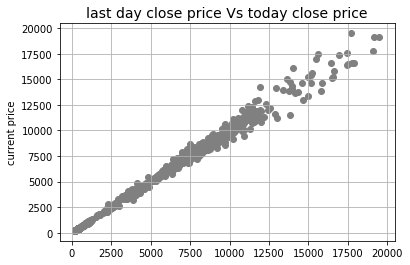

In [376]:
plt.scatter(x_data['close last day'],y_data,color='grey')
plt.title('last day close price Vs today close price', fontsize=14)
plt.ylabel('price t-1', fontsize=10)
plt.ylabel('current price', fontsize=10)
plt.grid(True)
plt.show()

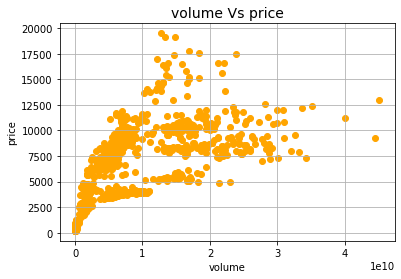

In [377]:
plt.scatter(x_data['volume'],y_data,color='orange')
plt.title('volume Vs price', fontsize=14)
plt.xlabel('volume', fontsize=10)
plt.ylabel('price', fontsize=10)
plt.grid(True)
plt.show()

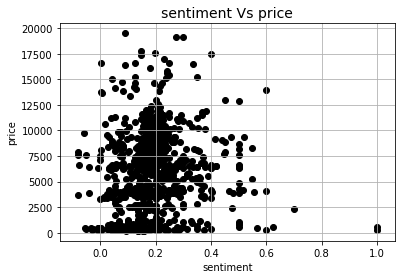

In [378]:
plt.scatter(x_data['sentiment'],y_data,color='black')
plt.title('sentiment Vs price', fontsize=14)
plt.xlabel('sentiment', fontsize=10)
plt.ylabel('price', fontsize=10)
plt.grid(True)
plt.show()

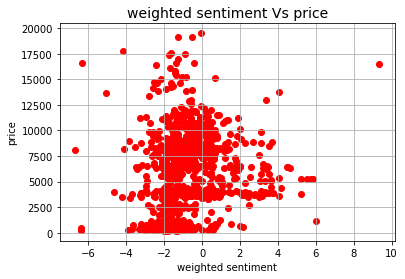

In [379]:
## taking log to the two variables 
plt.scatter((x_data['log w.sentiment']),(y_data),color='red')
plt.title('weighted sentiment Vs price', fontsize=14)
plt.xlabel('weighted sentiment', fontsize=10)
plt.ylabel('price', fontsize=10)
plt.grid(True)
plt.show()

In [380]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [381]:
x_data=x_data.dropna()
y_data=y_data.dropna()
n=(round(x_data.count()*.3))
n=(round(y_data.count()*.3))
n=int(n)

In [382]:
print(len(y_data))
print(len(x_data))


1183
1183


In [383]:
# Split the data into training/testing sets
x_data_train = x_data[:-n]
x_data_test = x_data[-n:]

# Split the targets into training/testing sets
y_data_train = y_data[:-n]
y_data_test = y_data[-n:]


###  ${Y} = {\alpha}_{0} +{\alpha}_{1} Y_{-1}+{\alpha}_{1} X_{1}+{\alpha}_{2} X_{2}+{\alpha}_{3} X_{3} +{\alpha}_{4} X_{4}+{\epsilon}$

$Y_{-1}= close last day$
<br>
$X_{1} = sentiment$
<br>
$X_{2} = volume$
<br>
$X_{3}=weighted_sentiment$
<br>
$X_{4}=log(weighted sentiment)$

In [384]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [385]:
# Train the model using the training sets
regr.fit(x_data_train, y_data_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [386]:
# Make predictions using the testing set
y_data_pred = regr.predict(x_data_test)

In [387]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 1.00321539e+00  2.92895067e+01 -9.43182105e-09 -8.97621942e-02
   3.88327143e+00]]


In [388]:
# The intercept
print('intercept: \n', regr.intercept_)

intercept: 
 [16.93332858]


### ${Y} =16.9 +1.0 Y_{-1}+0.296 X_{1}-0.94 X_{2}-0.89 X_{3} +0.38 X_{4} +{\epsilon} $
<br>
$Y_{-1}= close last day$
<br>
$X_{1} = sentiment$
<br>
$X_{2} = volume$
<br>
$X_{3}=weighted sentiment$
<br>
$X_{4}=log(weighted sentiment)$

In [389]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_data_test, y_data_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_data_test, y_data_pred))


Mean squared error: 119649.81
Coefficient of determination: 0.98


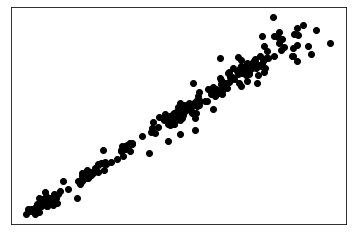

In [397]:
# Plot outputs
plt.scatter(y_data_test, y_data_pred,  color='black')

#plt.scatter(x_data_test['close last day'], y_data_test,  color='orange')
#plt.scatter(x_data_test['volume'], y_data_test,  color='red')
#plt.plot(y_data_test, y_data_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Model Results